# Exercise 2.1: Physics Content

Which variables are useful for us? 

In [2]:
import uproot as up
import numpy as np 

In [3]:
#get data
file = up.open("skim_BsToJPsiPhi_2017_DCAP_10000.root")
print(file.keys())
data = file["PDtree"]
print(data.keys())

[b'PDtree;18', b'PDtree;17']
[b'runNumber', b'lumiSection', b'eventNumber', b'nMuons', b'muoPt', b'muoEta', b'muoPhi', b'muoE', b'muoTrk', b'muoCharge', b'muoType', b'nElectrons', b'nJets', b'jetPt', b'jetEta', b'jetPhi', b'jetE', b'jetCSV', b'jetTCHE', b'jetTrg', b'jetPF', b'jetNDau', b'jetNHF', b'jetNEF', b'jetCHF', b'jetCEF', b'jetNCH', b'nTags', b'tagJet', b'tagType', b'tagProb', b'nPF', b'pfcPt', b'pfcEta', b'pfcPhi', b'pfcE', b'pfcCharge', b'pfcJet', b'pfcTrk', b'nTracks', b'trkPt', b'trkEta', b'trkPhi', b'trkCharge', b'trkType', b'trkNext', b'trkPFC', b'trkJet', b'trkPVtx', b'trkQuality', b'trkHitPattern', b'trkLayPattern', b'trkNormChi2', b'trkPtError', b'trkDxy', b'trkDz', b'trkExy', b'trkEz', b'trkVtxPx', b'trkVtxPy', b'trkVtxPz', b'nPVTotal', b'nPVertices', b'pvtX', b'pvtY', b'pvtZ', b'pvtSxx', b'pvtSyy', b'pvtSzz', b'pvtSxy', b'pvtSxz', b'pvtSyz', b'pvtNTracks', b'pvtNormChi2', b'pvtBadQuality', b'nSVertices', b'svtX', b'svtY', b'svtZ', b'svtSxx', b'svtSyy', b'svtSzz', b'sv

In [4]:
Nmuons = data.arrays(["nMuons"])[b'nMuons'] #number of muons detected in each event
#TO DO: how many events are there with 2 muons?
print(sum(Nmuons == 2))

1192


Pt is the $p_t = \sqrt{{p_x}^2 + {p_y}^2}$, i.e. transverse momentum, defined as momentum component perpendicular to the beam line (z axis).

In [5]:
MuoPt = data.arrays(["muoPt"])[b'muoPt'] 

$\eta$ and $\phi$ are defined as following: 

<img src="files/eta.png" align="left"> <img src="files/phi.png" align ="middle">

In [6]:
MuoEta = data.arrays(["muoEta"])[b'muoEta'] 
MuoPhi = data.arrays(["muoPhi"])[b'muoPhi'] 

If we want to calculate the cartesian coordinates:   $p_x = p_T \cdot \cos \phi$  , $p_y = p_T \cdot \sin \phi$ , $p_z = p_T \cdot \sinh \eta$ and $ \vert p \vert = p_T \cdot \cosh \eta $. <br> We will work with the ($p_T, \eta,\phi$) coordinates.

In [7]:
#TO DO: Calculate px, py, pz and |p| of muons.
p_x = MuoPt*np.cos(MuoPhi)
p_y = MuoPt*np.sin(MuoPhi)
p_z = MuoPt*np.sinh(MuoEta)
p_abs = MuoPt*np.cosh(MuoEta)

In [12]:
#TO DO: Make a cut on muon Pt: Get MuoPt values lower than 30. 
#       Get MuoEta and MuoPhi values of all muons with a Pt lower than 30. 
#Tipps: 1. In order to find what tools we have for the jagged arrays what you can do is, write "MuoEta." and 
#         then click Tab (have a look, like .content, .concatenate, .., for more info help(..))
#      2. Use .filter(f) with a custom function f. Below are two examples of how to create a function in Python.
#      3. Use .apply(f). What is the result? Can you use it for indexing?

#version 1
def f(a,b):
    return a+b
#version 2
f = lambda a,b: a+b

# f = ...


###Solution:

f = lambda x: x<30
MuoPt_30 = MuoPt.filter(f) 
MuoPt_30_index = MuoPt.apply(f)  #or simply MuoPt < 30
MuoEta_30 = MuoEta[MuoPt_30_index]
MuoPhi_30 = MuoPhi[MuoPt_30_index]



Exercise: Matplotlib 3d Plots


Text(0.5,0,'MuoE')

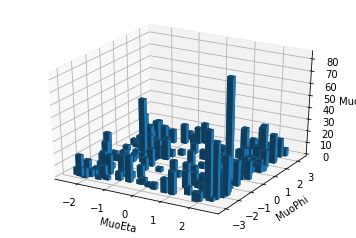

In [8]:
#TO DO: Create a 3D bar plot of muoEta, muoPhi, MuoE for muoPt < 30 in the first 50 events (use ax.bar3d)

MuoE = data.arrays(["muoE"])[b'muoE'] 
MuoE_30 = MuoE[MuoPt_30_index]


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # create a 3d plot

width = depth = 0.2
bottom = np.zeros_like(np.concatenate(MuoEta_30[:50]))
x = np.concatenate(MuoEta_30[:50])
y = np.concatenate(MuoPhi_30[:50])
z = np.concatenate(MuoE_30[:50])


ax.bar3d(x, y, bottom, width, depth,z, shade=True)

ax.set_xlabel("MuoEta")
ax.set_ylabel("MuoPhi")
ax.set_zlabel("MuoE")